# LAB 7: Regularisation models: Ridge, Lasso, Elastic net, and early stopping. Linear models for classificaton: Logistic regression, and Softmax regression 

The purpose of this lab work is to illustrate the regularisation of linear regression models such as Ridge regression, Lasso regression, and Elastic net, for preventing overfitting. In addition the early stopping regularisation is illustrated for iterative models such as Stochastic gradient descent (SGD).  Moreover, the purpose of the lab is also to see how linear models such as Logistic regression and Softmax regression work for binary classification and multiclass classification, respectively.

## Tasks 
1. Study and run (cell by cell) the code below which illustrates regularisation for regression linear models, that prevents overfitting. Study also the code that illustrates linear classification models such as Logistic and Softmax regressions.

2. In the Lab 3 we build several regression models predicting the median house price. You are required to build new models on the same dataset based on Ridge, Lasso and Elastic net by trying 2 values for each hyperparameter of the algorithm, and compare the RMSE performance you get on the test set. 

3. Similar to (2) above, but tune your models in a CV (cross validation). Use grids for  hyperparameters. 

4. For the Lasso model obtained in (3), see which features it selects as important (see discussion on feature selection in the lecture). 

5.  Tackle the exercises provided in the slides of Lecture 6 (or finish at home when you revise your lecture and recomended chapter).

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Regularized Linear Models

## Ridge Regression

In [4]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [12]:
# Regularisation hyperparameter for Ridge is as seen in the lecture:
# alpha - the strength of regularisation.
# Here solver="cholesky" chooses the one of the possible methods to compute the model,
# which is based on a closed-form solution (mathematical formula) based on the so called Cholesky method.

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [13]:
# In additon to the closed-form solution illustrated above, Ridge can also be computed 
# iteratively with gradient descent, using an L2 penalty (see penalty="l2") as discussed in lecture. 
# Here we illustrate it using Stochastic gradient descent (SGD).
# Notice the regularisation hyperparameter alpha. 
# Due to the random nature of the algorithm (selection of instances to 
# calculate the gradients and update the coefficients
# is done randomly, as seen in lecture), random_state controls the random generator used in the
# selection of these instances.


from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.38390205])

## Lasso Regression

In [14]:
# Regularisation hyperparameter for Lasso is as seen in the lecture:
# alpha - the strength of regularisation.

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [15]:
# Here are the coefficient(s) of the Lasso model: 

lasso_reg.coef_

array([0.26167212])

In [7]:
# Note on using Lasso for feature selection: 
# For complex datasets with many features, you can check which
# features have a coefficient equal to 0 in the Lasso model. Those features are
# not considered important by the model and so not used since they have a 0 coefficient. 
# The features with non- zero coefficients can be seen as the features selected by the Lasso model.
# Hence Lasso algo is not only used for building a model, but can be used for feature selection too.
# For a dataset which is very large and has many features, or for which you suspect it may have some 
# unuseful features, to prevent a large amount of computation, 
# you can do a feature selection with Lasso (which is cheap to compute), 
# and then use another algo to build a more powerful (possibly more computationally expensive) 
# model on the selected features to reach better predictions. 
# Indeed, this method may eliminate unuseful features, and may make the
# computation amount more feasable. 

In [17]:
# Lasso can also be computed iteratively with Stochastic gradient descent algo
# as seen for Ridge above. In this case we use L1 penalty 
# as discussed in lecture (see penalty="l1" in the command). 

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.45526648])

## Elastic Net

In [18]:
# Regularisation hyperparameters for Elastic net are as seen in the lecture:
# alpha - the strength of regularisation, and l1_ratio (r in the slides)
# which controls the mixture of Lasso (L1 regularisation) and Ridge (L2 regularisation) 
# as part of Elastic net. 
# l1_ratio=0.5 means we have 50% of Lasso and remaining 50% of Ridge. 

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [19]:
# Elastic net can also be computed iteratively with Stochastic gradient descent
# as seen for Ridge and Lasso above. In this case we use both L1 and L2 penalties 
# as discussed in lecture, which is set by  the parameter penalty="elasticnet" in the command below. 
# In additon we specify the strengh of rgularisation alpha=0.1, and 
# the l1_ratio=0.5 (hyperparametr r in the lecture slides)
# that controls the mixture of Lasso and Ridge as explained in the lecture.
# l1_ratio=0.5 means we have 50% of Lasso and remaining 50% of Ridge. 

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="elasticnet", alpha=0.1, l1_ratio=0.5, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.45913103])

## Early Stopping

In [20]:
# As seen in lecture, early stopping is another (simple and useful) regularisation method, 
# constraining the number of iterations an algo does, to prevent overfitting. 
# In the example below, the iterative updating of the model's coefficients 
# stops when the error starts to increase on the validation set as discussed in the lecture, 
# or in other words, it stops to decrease.
# Here, early stopping is used for this Lasso model implemented with Stochastic gradient descent,
# and the validation set is 30% of the dataset (see validation_fraction=0.3).
# Training will stop (early) when the loss (error) doesn't improve for a number of steps
# given by n_iter_no_change=5. 
# That is, if (loss > best_loss - tol) for 5 consecutive epochs, there is no significant 
# improvement (decrease) of the loss by at least a tolerance level tol=1e-3, and training stops. 
# Such details on algo parameters can be consulted online as sklearn has an excellent 
# documentation: google sklean and the name of algo (here SDGRegressor)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, 
                       max_iter=1000, early_stopping=True, validation_fraction=0.3, 
                       n_iter_no_change=5, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.35926086])

# Logistic Regression

Saving figure logistic_function_plot


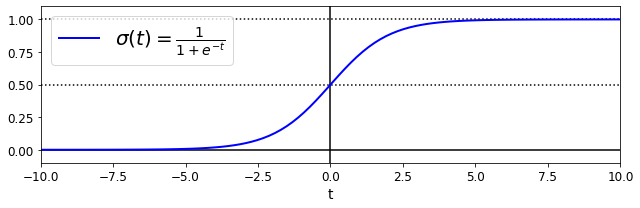

In [21]:
# Let's see how the sigmoid function (or logistic function) looks like.
# This function is used in Logistic Regression for classification to compute the 
# probability of a class.
# (The function is used also in neural nets - studied in next labs)

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [23]:
# Now we use the iris dataset, available in sklearn library, to illustrate the simple Logistic regression for 2 classes, 
# and Softmax regression for multiple classes

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [24]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
# feature values
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [27]:
# a full description of the data
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [28]:
# We prepare data to learn a simple logistic regression model predicting the plant based on 1 feature only: petal width 
# and it is a binary classification: class 1 (Iris virginica) and class 0 (not Iris Virginica)

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

/tmp/ipykernel_645460/1872568798.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [30]:
# Let's see the coefficient w1 of the feature petal width, and the intercept w0 in the logistic model
# You can access these as atributes of the model: coef_ and intercept_ 
# See these in the details of LogisticRegression class in the sklearn documentation 
# (as usual, just google "LogisticRegression sklearn")

print('coefficint= ', log_reg.coef_, ', intercept= ', log_reg.intercept_)

coefficint=  [[4.3330846]] , intercept=  [-7.1947083]


This means that the probability computed by the logistic model for class Iris virginica is $\sigma(t) = \frac{1}{1 + e^{-t}}$ where $t=4.3330846 * x_1 -7.1947083$ and $x_1$ is the petal width feature.
The probability for the class Not Iris virginica is the complement with respect to 100% of the above probability.

Text(0, 0.5, 'Probability')

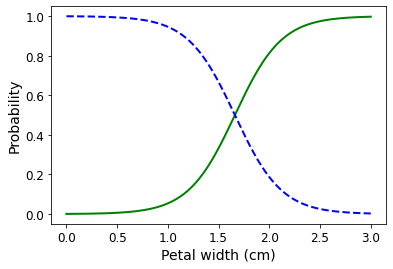

In [31]:
# Plotting the probability curves for Iris virginica (green) and not Iris virginica (blue) based on 1 feature: petal width
# We see from this chart that the probability of virginica increases with the petal width

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)

In [34]:
# Decison boudary as the point where both classes in this binalry classification are equally probable 
# When Petal width is about 1.66, both classes have probability 0.5, that's a decision boundary

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
decision_boundary

array([1.66066066])

In [35]:
# Remember this model is for binary classification: class 1 (Iris virginica) and class 0 (not Iris Virginica)
# Now we predict class for plants with Petal with 1.7 and 1.5
# We see the 1st is predicted as class 1 (Iris virginica) and the 2nd as class 0 (not Iris Virginica)

log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression: used with multiple classes

In [36]:
# Prepare data to make predictions based on 2 features petal length, petal width, 
# and all the 3 classes in the dataset

print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [38]:
# The hyperparameter controlling the regularization strength of a sklearn LogisticRegression model is not alpha 
# (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularised.

from sklearn.linear_model import LogisticRegression
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [39]:
# Predict the class of a plant with petal lenth 5 and petal width 2
# we can see the predicted class is 2 (virginica)

softmax_reg.predict([[5, 2]])

array([2])

In [40]:
# Here are the probabilities of the 3 classes for this plant
# We see they add up to 100%, and that the largest probability about 94% is for the the 3rd class - virginica

softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])